# Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `figure5_10_timeseries.ipynb` is copied from `9_manuscript_figures.ipynb` inside the `CER_timeseries_analysis` GitHub repo
* this script uses pickle files created in **3_create_tidy_pickle.ipynb** in that GitHub repo 
* i've copied them here so that I can put all the figure making script inside the `CER_treatment_manuscript` GitHub repo instead

created by Cassie Lumbrazo\
last updated: July 2025\
run location: UAS Linux\
python environment: **cer_treatment**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

In [2]:
# define path to save the figures to
# figure_path = "C:\\Users\\Lumbr\\OneDrive - UW\\Documents - mountainhydro\\People\\CassieLumbrazo\\EasternCascades\\Writing\\5_Manuscript\\2_PostDefense\\python_figures\\"
figure_path = '/home/cassie/data/cer_treatment_manuscript/figures/' # Cassie remote path on new linux machine

# filepath = '/home/cassie/data/cer_treatment_manuscript/pickle/' # Cassie remote path on new linux machine
filepath = '/home/cassie/data/cer_treatment_manuscript/joblib/' # Cassie remote path on new linux machine

Open the cleaned pickle files

In [3]:
# instead of opening the pickle files, let's open the joblib files
import joblib

CNF21 = joblib.load(filepath + 'CNF21.joblib')
CNG21 = joblib.load(filepath + 'CNG21.joblib')
CSF21 = joblib.load(filepath + 'CSF21.joblib')
CSG21 = joblib.load(filepath + 'CSG21.joblib')

CNF23 = joblib.load(filepath + 'CNF23.joblib')
CNG23 = joblib.load(filepath + 'CNG23.joblib')
CSF23 = joblib.load(filepath + 'CSF23.joblib')
CSG23 = joblib.load(filepath + 'CSG23.joblib')

CN20 = joblib.load(filepath + 'CN20.joblib')
CN50 = joblib.load(filepath + 'CN50.joblib')
CN60 = joblib.load(filepath + 'CN60.joblib')
CN70 = joblib.load(filepath + 'CN70.joblib')

CS20 = joblib.load(filepath + 'CS20.joblib')
CS50 = joblib.load(filepath + 'CS50.joblib')
CS60 = joblib.load(filepath + 'CS60.joblib')
CS120 = joblib.load(filepath + 'CS120.joblib')

SDD_CN23 = joblib.load(filepath + 'SDD_CN23.joblib')
SDD_CS23 = joblib.load(filepath + 'SDD_CS23.joblib')

not opening the pickle files anymore, using joblib files...

In [4]:
# # forest and gap sites 
# CNF21 = pickle.load(open(filepath + "CNF21.pkl", "rb"))
# CNG21 = pickle.load(open(filepath + "CNG21.pkl", "rb"))
# CSF21 = pickle.load(open(filepath + "CSF21.pkl", "rb"))
# CSG21 = pickle.load(open(filepath + "CSG21.pkl", "rb"))

# CNF23 = pickle.load(open(filepath + "CNF23.pkl", "rb"))
# CNG23 = pickle.load(open(filepath + "CNG23.pkl", "rb"))
# CSF23 = pickle.load(open(filepath + "CSF23.pkl", "rb"))
# CSG23 = pickle.load(open(filepath + "CSG23.pkl", "rb"))

# # the other post treatment sites 
# CN20 = pickle.load(open(filepath + "CN20.pkl", "rb"))
# CN50 = pickle.load(open(filepath + "CN50.pkl", "rb"))
# CN60 = pickle.load(open(filepath + "CN60.pkl", "rb"))
# CN70 = pickle.load(open(filepath + "CN70.pkl", "rb"))

# CS20  = pickle.load(open(filepath + "CS20.pkl", "rb"))
# CS50  = pickle.load(open(filepath + "CS50.pkl", "rb"))
# CS60  = pickle.load(open(filepath + "CS60.pkl", "rb"))
# CS120 = pickle.load(open(filepath + "CS120.pkl", "rb"))

# # now the SDD files too
# SDD_CN23 = pickle.load(open(filepath + "SDD_CN23.pkl", "rb"))
# SDD_CS23 = pickle.load(open(filepath + "SDD_CS23.pkl", "rb"))

Below is the normalization code from **4_normalize_snowdepth** notebook\
keep it here for now incase I want to plot the normalized snow depth too. 

In [5]:
# normalized to the forest side (f) vs the gap side (g) on the same slope as the treatment sites
# north sites 
CN20['normf'] = CN20['Median_depth'] - CNF23['Median_depth']
CN20['normg'] = CN20['Median_depth'] - CNG23['Median_depth']

CN50['normf'] = CN50['Median_depth'] - CNF23['Median_depth']
CN50['normg'] = CN50['Median_depth'] - CNG23['Median_depth']

CN60['normf'] = CN60['Median_depth'] - CNF23['Median_depth']
CN60['normg'] = CN60['Median_depth'] - CNG23['Median_depth']

CN70['normf'] = CN70['Median_depth'] - CNF23['Median_depth']
CN70['normg'] = CN70['Median_depth'] - CNG23['Median_depth']

# south sites
CS20['normf'] = CS20['Median_depth'] - CSF23['Median_depth']
CS20['normg'] = CS20['Median_depth'] - CSG23['Median_depth']

CS50['normf'] = CS50['Median_depth'] - CSF23['Median_depth']
CS50['normg'] = CS50['Median_depth'] - CSG23['Median_depth']

CS60['normf'] = CS60['Median_depth'] - CSF23['Median_depth']
CS60['normg'] = CS60['Median_depth'] - CSG23['Median_depth']

CS120['normf'] = CS120['Median_depth'] - CSF23['Median_depth']
CS120['normg'] = CS120['Median_depth'] - CSG23['Median_depth']

Plot the same BAFs on the north and south together to compare 

The code above uses the previous colors, but I am going to\
make all the north and south sides match for simplicity 

Same one as above, except with the gap at the top, then BAF 20,50,60,120, then the forest site

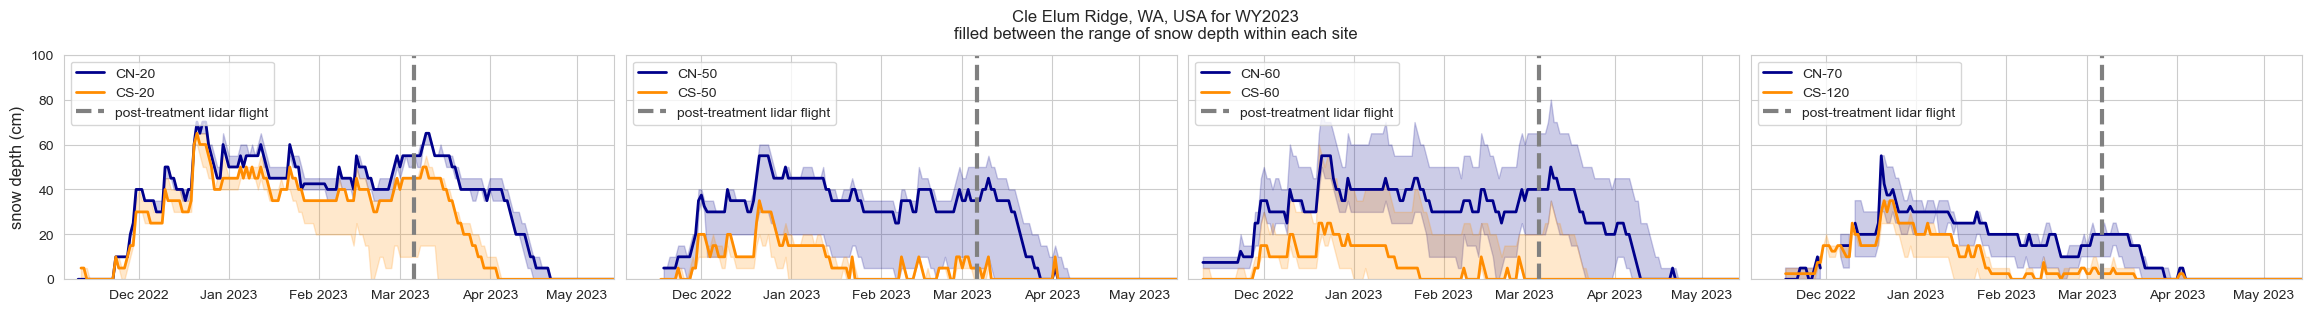

In [6]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,4,figsize = (23,3), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)", fontsize=12)
# ax[2].set_ylabel("snow depth (cm)", fontsize=12)
# ax[3].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

plt.show()

In [7]:
sns.set_theme()

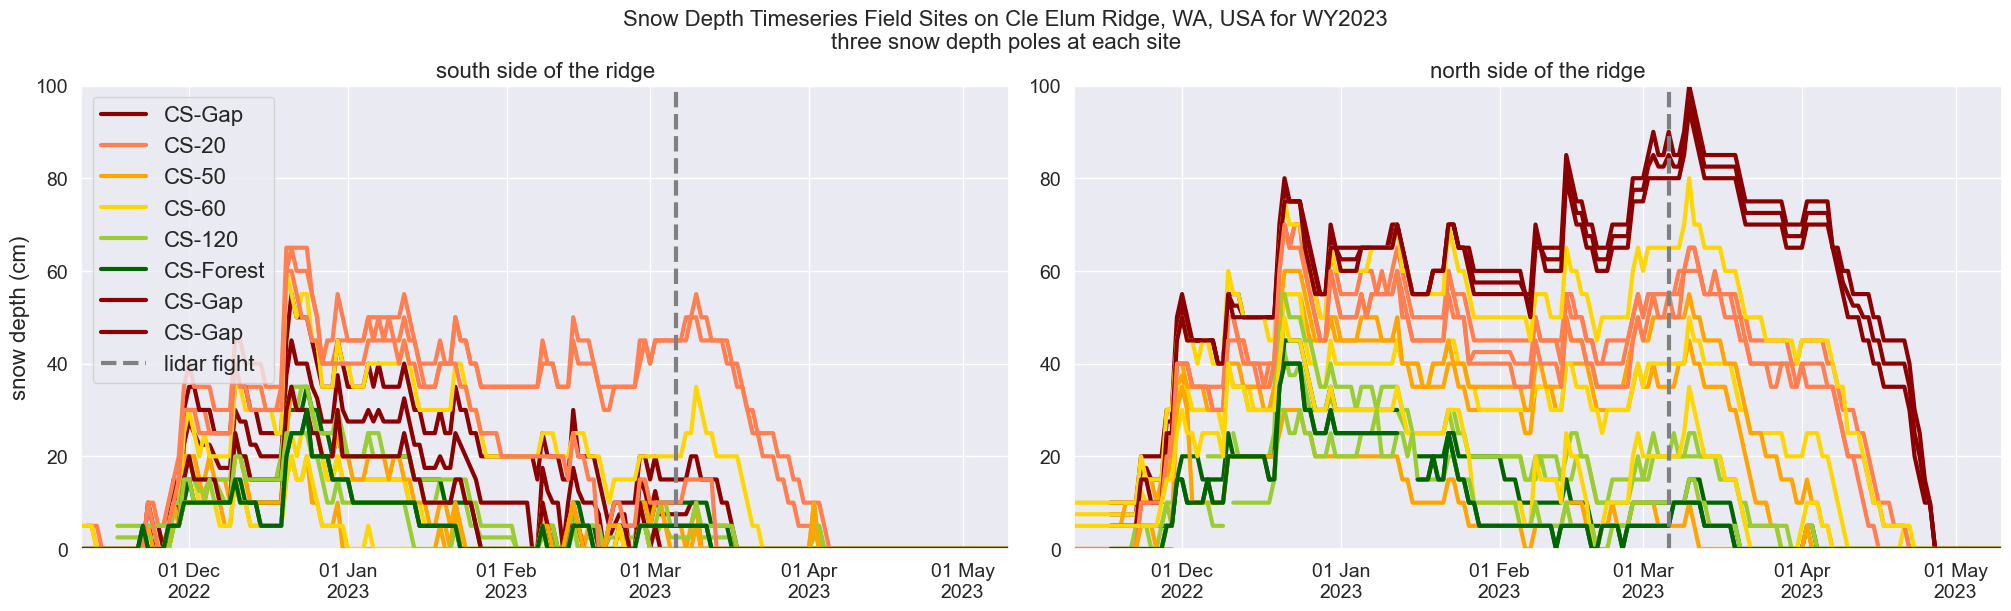

In [8]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_theme()

fig, ax = plt.subplots(1,2,figsize = (20,6), sharey=False, sharex=True, constrained_layout=True)

alpha=1
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "darkred"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

linewidth = 3
# add the other treatment sites for the north and south sides
# color20 = "#E49273"; color50 = "#D4CB92"; color60 = "#395c6b"; color70 = "#6A041D"
color20 = "coral"; color50 = "orange"; color60 = "gold"; color70 = "yellowgreen"

# plot median
ax[1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth)

ax[1].plot(CN20['Date'], CN20['Median_depth'], color = color20, label="CN-20", linewidth=linewidth)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = color50, label="CN-50"  , linewidth=linewidth)
ax[1].plot(CN60['Date'], CN60['Median_depth'], color = color60, label="CN-60"  , linewidth=linewidth)
ax[1].plot(CN70['Date'], CN70['Median_depth'], color = color70, label="CN-70"  , linewidth=linewidth)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = color20, label="CS-20", linewidth=linewidth)
ax[0].plot(CS50['Date'], CS50['Median_depth'], color = color50, label="CS-50",  linewidth=linewidth)
ax[0].plot(CS60['Date'], CS60['Median_depth'], color = color60, label="CS-60",  linewidth=linewidth)
ax[0].plot(CS120['Date'], CS120['Median_depth'], color = color70, label="CS-120",  linewidth=linewidth)

# putting forest here so it appears at the bottom of the legend
ax[1].plot(CNF23['Date'], CNF23['Maximum_depth'], color = colorf1, label="CN-Forest", linewidth=linewidth)
ax[0].plot(CSF23['Date'], CSF23['Maximum_depth'], color = colorf1, label="CS-Forest", linewidth=linewidth)

linewidth = 3
alpla = 1
# plot maximum
ax[1].plot(CNG23['Date'], CNG23['Maximum_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth)
ax[0].plot(CSG23['Date'], CSG23['Maximum_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth)

ax[1].plot(CN20['Date'], CN20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN50['Date'], CN50['Maximum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN60['Date'], CN60['Maximum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN70['Date'], CN70['Maximum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)

ax[0].plot(CS20['Date'], CS20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0].plot(CS50['Date'], CS50['Maximum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0].plot(CS60['Date'], CS60['Maximum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0].plot(CS120['Date'], CS120['Maximum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)

# putting forest here so it appears at the bottom of the legend
ax[1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)
ax[0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

# plot maximum
ax[1].plot(CNG23['Date'], CNG23['Minimum_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth)
ax[0].plot(CSG23['Date'], CSG23['Minimum_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth)

ax[1].plot(CN20['Date'], CN20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN50['Date'], CN50['Minimum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN60['Date'], CN60['Minimum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[1].plot(CN70['Date'], CN70['Minimum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)

ax[0].plot(CS20['Date'], CS20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0].plot(CS50['Date'], CS50['Minimum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0].plot(CS60['Date'], CS60['Minimum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0].plot(CS120['Date'], CS120['Minimum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)

# putting forest here so it appears at the bottom of the legend
ax[1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)
ax[0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)


# OTHERS 
# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)

ax[0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 10)])
ax[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize = 16)
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Snow Depth Timeseries Field Sites on Cle Elum Ridge, WA, USA for WY2023\nthree snow depth poles at each site", fontsize = 16)

ax[1].set_title("north side of the ridge", fontsize = 16)
ax[0].set_title("south side of the ridge", fontsize = 16)

# increase the size of the x and y tick marks
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[0].legend(loc='upper left', fontsize = 16)

ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)

plt.show()

### Let's try to put these together...

## There is some missing data for the site openness from the forest and gap sites
Let's fill those values with the values from Dickerson-Lange et al. 2023, from the same exact poles

In [9]:
SDD_CN23.head()

,LocationID,Site,Plot,BAF,Position,median_gapf,min_gapf,max_gapf,ImageGLA,SiteOpennessGLA,...,SDD4,SDD5,SDD6,SDD7,SDD8,SDD9,SDD10,SDD11,Notes,Notes2
0,CN-20-1,CN,CN-20,20.0,1,48.355,47.445,97.944,113.0,48.95,...,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN
1,CN-20-2,CN,CN-20,20.0,2,52.051,50.606,60.791,119.0,45.95,...,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN
2,CN-20-3,CN,CN-20,20.0,3,38.864,37.983,50.455,122.0,57.84,...,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN
3,CN-20-4,CN,CN-20,20.0,4,48.894,48.164,54.347,127.0,48.35,...,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN
4,CN-20-5,CN,CN-20,20.0,5,51.431,51.171,56.294,134.0,45.05,...,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN


In [10]:
# SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1", 'SiteOpennessAdjusted'] = 70
print('CN G pole 1:', SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1", 'SiteOpennessAdjusted'])
print('CN G pole 2: ', SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2", 'SiteOpennessAdjusted'])
print('CN G pole 3: ', SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3", 'SiteOpennessAdjusted'])

print('CS G pole 1:', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1", 'SiteOpennessAdjusted'])
print('CS G pole 2: ', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2", 'SiteOpennessAdjusted'])
print('CS G pole 3: ', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3", 'SiteOpennessAdjusted'])

print('CN F pole 1:', SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1", 'SiteOpennessAdjusted'])
print('CN F pole 2: ', SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2", 'SiteOpennessAdjusted'])
print('CN F pole 3: ', SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3", 'SiteOpennessAdjusted'])

print('CS F pole 1:', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1", 'SiteOpennessAdjusted'])
print('CS F pole 2: ', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2", 'SiteOpennessAdjusted'])
print('CS F pole 3: ', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3", 'SiteOpennessAdjusted'])

CN G pole 1: 69    29.77
Name: SiteOpennessAdjusted, dtype: float64
CN G pole 2:  70    60.85
Name: SiteOpennessAdjusted, dtype: float64
CN G pole 3:  71    61.72
Name: SiteOpennessAdjusted, dtype: float64
CS G pole 1: 141    60.04
Name: SiteOpennessAdjusted, dtype: float64
CS G pole 2:  142    70.71
Name: SiteOpennessAdjusted, dtype: float64
CS G pole 3:  143   NaN
Name: SiteOpennessAdjusted, dtype: float64
CN F pole 1: 57    15.51
Name: SiteOpennessAdjusted, dtype: float64
CN F pole 2:  58    14.81
Name: SiteOpennessAdjusted, dtype: float64
CN F pole 3:  59    11.24
Name: SiteOpennessAdjusted, dtype: float64
CS F pole 1: 129    7.51
Name: SiteOpennessAdjusted, dtype: float64
CS F pole 2:  130    8.27
Name: SiteOpennessAdjusted, dtype: float64
CS F pole 3:  131    11.65
Name: SiteOpennessAdjusted, dtype: float64


In [11]:
print('CS G pole 2: ', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2", 'SiteOpennessAdjusted'])

CS G pole 2:  142    70.71
Name: SiteOpennessAdjusted, dtype: float64


In [12]:
print('CS G pole 3: ', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3", 'SiteOpennessAdjusted'])

CS G pole 3:  143   NaN
Name: SiteOpennessAdjusted, dtype: float64


In [13]:
SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3", 'SiteOpennessAdjusted'] = 65
print('CS G pole 3: ', SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3", 'SiteOpennessAdjusted'])

CS G pole 3:  143    65.0
Name: SiteOpennessAdjusted, dtype: float64


Also, for some reason, `CSG23['pole2']` is not plotting, which is the same as `CSG23['Median_depth']`

In [14]:
# replace the values for CSG23['pole2'] with CSG23['Median_depth']
CSG23['Pole2'] ==  CSG23['Median_depth'].copy()
CSG23['Pole2']


Date
2022-11-10    0.0
2022-11-11    0.0
2022-11-12    0.0
2022-11-13    0.0
2022-11-14    0.0
             ... 
2023-06-10    0.0
2023-06-11    0.0
2023-06-12    0.0
2023-06-13    0.0
2023-06-14    0.0
Name: Pole2, Length: 217, dtype: float64

In [15]:
# Let's just check out the min and max values 
print('max south', SDD_CS23['SiteOpennessAdjusted'].max())
print('min south', SDD_CS23['SiteOpennessAdjusted'].min())

print('max north', SDD_CN23['SiteOpennessAdjusted'].max())
print('min north', SDD_CN23['SiteOpennessAdjusted'].min())

max south 74.33
min south 6.23
max north 61.72
min north 9.47


Let's just make another version which has a different colorbar... 

# Figure 5

/tmp/ipykernel_3279709/3235502573.py:113: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[1,1].plot(CN20['Date'], CN20['Pole1'], linewidth=linewidth, label = "CN-20-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
/tmp/ipykernel_3279709/3235502573.py:114: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[1,1].plot(CN20['Date'], CN20['Pole2'], linewidth=linewidth, label = "CN-20-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
/tmp/ipykernel_3279709/3235502573.py:115: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[1,1].plot(CN20['Date'], CN20['Pole3'], linewidth=linewidth, label = "CN-20-pole3", c=cmap(int(

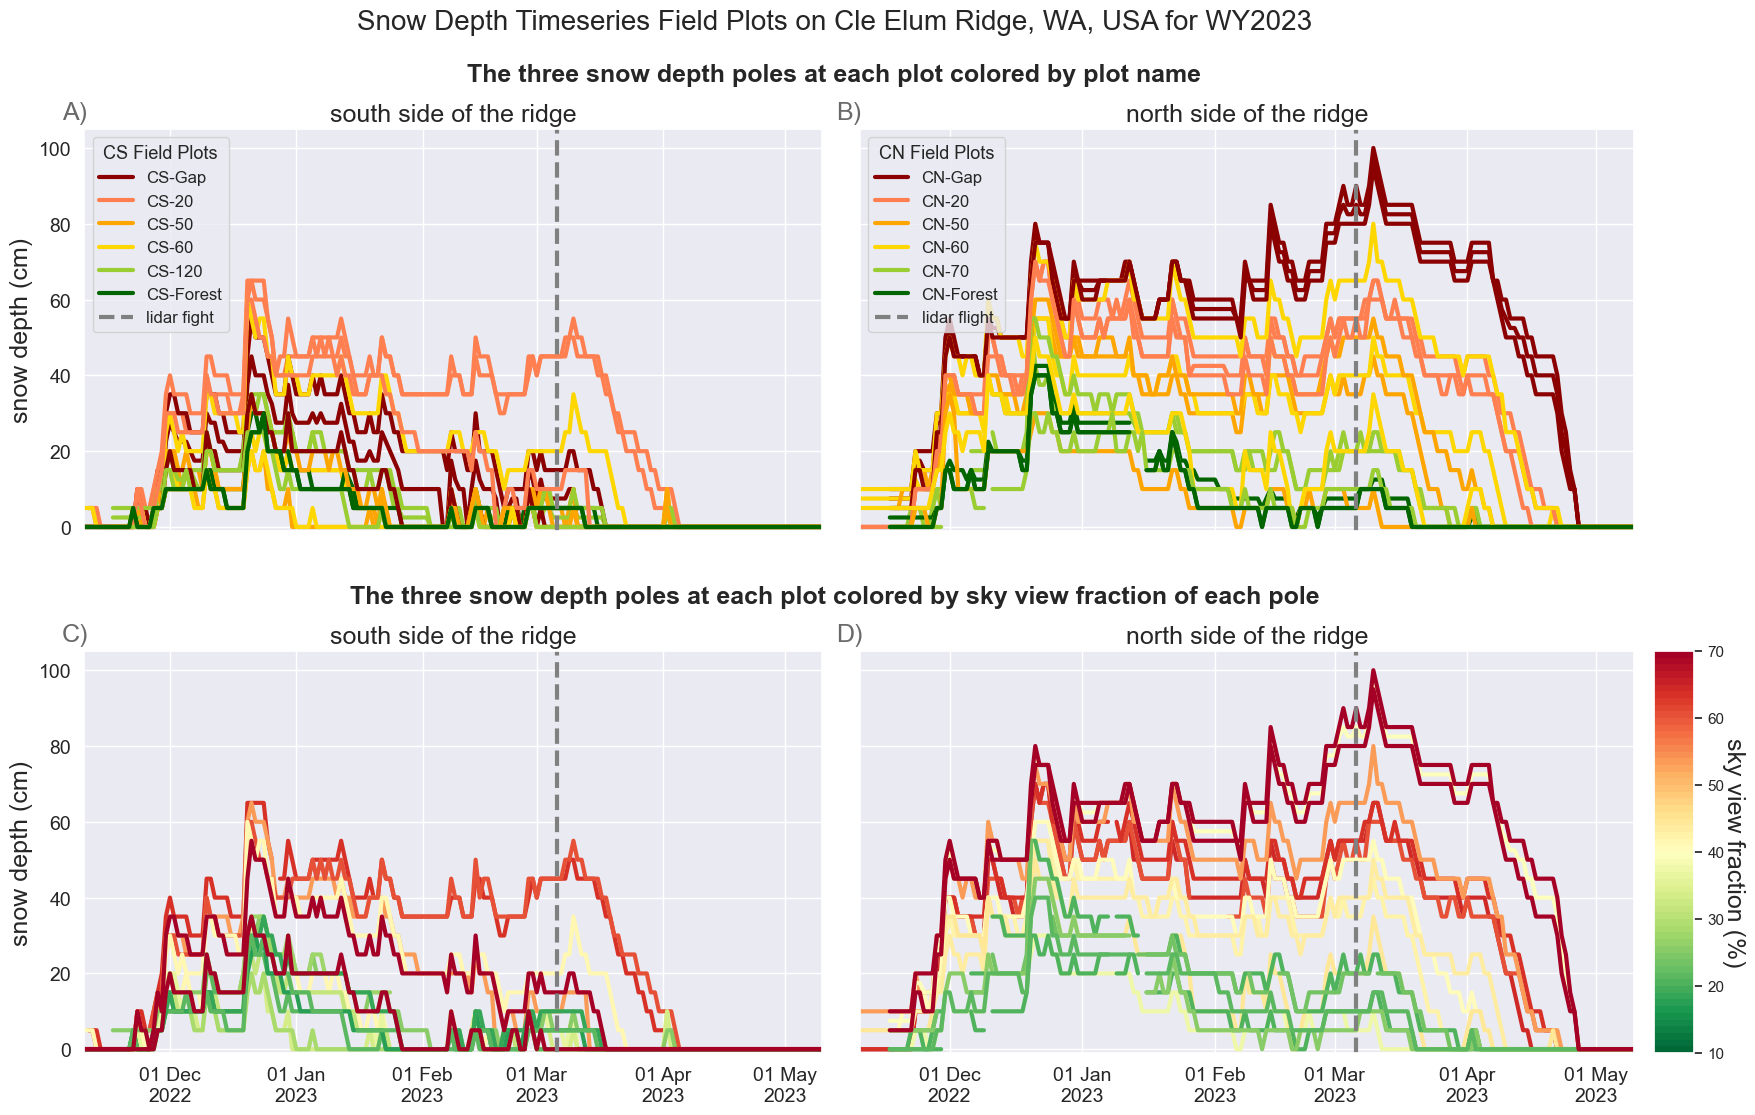

In [16]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_theme()
linewidth = 3

fig, ax = plt.subplots(2,2,figsize = (20,12), sharey=True, sharex='col', gridspec_kw={'width_ratios': [1, 1.05]})

alpha=1
colorf1 = "darkgreen"
colorg1 = "darkred"

color20 = "coral"; color50 = "orange"; color60 = "gold"; color70 = "yellowgreen"

# COLORBAR 
#The following code sets up the colorbar, if we want to normalize using the data but this got confusing so commented out for now
# N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
# norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))

# without using the min max of the data, instead setting them 
colorbar_min = 10
colorbar_max = 70
N = int(colorbar_max - colorbar_min)
norm = mpl.colors.Normalize(vmin=colorbar_min, vmax=colorbar_max)  # adjust the vmin and vmax values as needed

cmap = plt.get_cmap('RdYlGn_r', N) # chaning the colors to greys
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Create a single colorbar for the second row
# cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # adjust position and size
cbar_ax = fig.add_axes([0.91, 0.11, 0.02, 0.335])  # adjust position and size
cbar = fig.colorbar(sm, cax=cbar_ax, label='sky view fraction (%)')
cbar.set_label(cbar.ax.get_ylabel(), rotation=270, labelpad=15, fontsize=18)


# plot median
ax[0,0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth)
ax[0,0].plot(CS20['Date'], CS20['Median_depth'], color = color20, label="CS-20", linewidth=linewidth)
ax[0,0].plot(CS50['Date'], CS50['Median_depth'], color = color50, label="CS-50",  linewidth=linewidth)
ax[0,0].plot(CS60['Date'], CS60['Median_depth'], color = color60, label="CS-60",  linewidth=linewidth)
ax[0,0].plot(CS120['Date'], CS120['Median_depth'], color = color70, label="CS-120",  linewidth=linewidth)
ax[0,0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest", linewidth=linewidth)

ax[0,1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth)
ax[0,1].plot(CN20['Date'], CN20['Median_depth'], color = color20, label="CN-20", linewidth=linewidth)
ax[0,1].plot(CN50['Date'], CN50['Median_depth'], color = color50, label="CN-50"  , linewidth=linewidth)
ax[0,1].plot(CN60['Date'], CN60['Median_depth'], color = color60, label="CN-60"  , linewidth=linewidth)
ax[0,1].plot(CN70['Date'], CN70['Median_depth'], color = color70, label="CN-70"  , linewidth=linewidth)
ax[0,1].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest", linewidth=linewidth)

# plot maximum
ax[0,0].plot(CSG23['Date'], CSG23['Maximum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS20['Date'], CS20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS50['Date'], CS50['Maximum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS60['Date'], CS60['Maximum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS120['Date'], CS120['Maximum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

ax[0,1].plot(CNG23['Date'], CNG23['Maximum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN20['Date'], CN20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN50['Date'], CN50['Maximum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN60['Date'], CN60['Maximum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN70['Date'], CN70['Maximum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

# plot maximum
ax[0,0].plot(CSG23['Date'], CSG23['Minimum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS20['Date'], CS20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS50['Date'], CS50['Minimum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS60['Date'], CS60['Minimum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS120['Date'], CS120['Minimum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

ax[0,1].plot(CNG23['Date'], CNG23['Minimum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN20['Date'], CN20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN50['Date'], CN50['Minimum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN60['Date'], CN60['Minimum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN70['Date'], CN70['Minimum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)


## CONSTANTS FOR ROW 1
# OTHERS 
# add lines for the lidar data flights
ax[0,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=3)
ax[0,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)

ax[0,0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 10)])
ax[0,1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])

ax[0,0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[0,1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0,0].set_ylabel("snow depth (cm)", fontsize = 18)
# ax[0,1].set_ylabel("snow depth (cm)")

ax[0,1].set_title("north side of the ridge", fontsize = 18)
ax[0,0].set_title("south side of the ridge", fontsize = 18)

# increase the size of the x and y tick marks
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)

# ax[0,0].legend(loc='upper left', fontsize = 14)
# ax[0,1].legend(loc='upper left', fontsize = 14)

ax[0,0].set_ylim(0,100)
ax[0,1].set_ylim(0,100)


# PART 2---------------------------------------------------------------------------------------------------------------------------------------------------

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1,1].plot(CN20['Date'], CN20['Pole1'], linewidth=linewidth, label = "CN-20-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[1,1].plot(CN20['Date'], CN20['Pole2'], linewidth=linewidth, label = "CN-20-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[1,1].plot(CN20['Date'], CN20['Pole3'], linewidth=linewidth, label = "CN-20-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[1,1].plot(CN50['Date'], CN50['Pole1'], linewidth=linewidth, label = "CN-50-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[1,1].plot(CN50['Date'], CN50['Pole2'], linewidth=linewidth, label = "CN-50-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[1,1].plot(CN50['Date'], CN50['Pole3'], linewidth=linewidth, label = "CN-50-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[1,1].plot(CN60['Date'], CN60['Pole1'], linewidth=linewidth, label = "CN-60-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[1,1].plot(CN60['Date'], CN60['Pole2'], linewidth=linewidth, label = "CN-60-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[1,1].plot(CN60['Date'], CN60['Pole3'], linewidth=linewidth, label = "CN-60-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[1,1].plot(CN70['Date'], CN70['Pole1'], linewidth=linewidth, label = "CN-70-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[1,1].plot(CN70['Date'], CN70['Pole2'], linewidth=linewidth, label = "CN-70-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[1,1].plot(CN70['Date'], CN70['Pole3'], linewidth=linewidth, label = "CN-70-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[1,1].plot(CNF23['Date'], CNF23['Pole1'], linewidth=linewidth, label = "CN-F-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[1,1].plot(CNF23['Date'], CNF23['Pole2'], linewidth=linewidth, label = "CN-F-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[1,1].plot(CNF23['Date'], CNF23['Pole3'], linewidth=linewidth, label = "CN-F-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[1,1].plot(CNG23['Date'], CNG23['Pole1'], linewidth=linewidth, label = "CN-G-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[1,1].plot(CNG23['Date'], CNG23['Median_depth'], linewidth=linewidth, label = "CN-G-pole1", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[1,1].plot(CNG23['Date'], CNG23['Pole2'], linewidth=linewidth, label = "CN-G-pole2", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[1,1].plot(CNG23['Date'], CNG23['Pole3'], linewidth=linewidth, label = "CN-G-pole3", c=cmap(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))


ax[1,1].set_ylim(-1,105)
ax[1,1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])
ax[1,1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# ax[1,1].set_ylabel("snow depth (cm)", fontsize=14)
ax[1,1].set_title("north side of the ridge", fontsize=18)

# SOUTH _________________________________________________________________________________________________   

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1,0].plot(CS20['Date'], CS20['Pole1'], linewidth=linewidth,  label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1,0].plot(CS20['Date'], CS20['Pole2'], linewidth=linewidth, label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1,0].plot(CS20['Date'], CS20['Pole3'], linewidth=linewidth, label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1,0].plot(CS50['Date'], CS50['Pole1'], linewidth=linewidth, label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1,0].plot(CS50['Date'], CS50['Pole2'], linewidth=linewidth, label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1,0].plot(CS50['Date'], CS50['Pole3'], linewidth=linewidth, label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1,0].plot(CS60['Date'], CS60['Pole1'], linewidth=linewidth, label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1,0].plot(CS60['Date'], CS60['Pole2'], linewidth=linewidth, label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1,0].plot(CS60['Date'], CS60['Pole3'], linewidth=linewidth, label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1,0].plot(CS120['Date'], CS120['Pole1'], linewidth=linewidth, label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1,0].plot(CS120['Date'], CS120['Pole2'], linewidth=linewidth, label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1,0].plot(CS120['Date'], CS120['Pole3'], linewidth=linewidth, label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1,0].plot(CSF23['Date'], CSF23['Pole1'], linewidth=linewidth, label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1,0].plot(CSF23['Date'], CSF23['Pole2'], linewidth=linewidth, label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1,0].plot(CSF23['Date'], CSF23['Pole3'], linewidth=linewidth, label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1,0].plot(CSG23['Date'], CSG23['Pole1'], linewidth=linewidth, label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1,0].plot(CSG23['Date'], CSG23['Pole2'], linewidth=linewidth, label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
# ax[1,0].plot(CSG23['Date'], CSG23['Median_depth'], linewidth=linewidth, label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
ax[1,0].plot(CSG23['Date'], CSG23['Pole3'], linewidth=linewidth, label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))

ax[1,0].set_ylim(-1,105)
ax[1,0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])
ax[1,0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[1,0].set_title("south side of the ridge", fontsize=18)
ax[1,0].set_ylabel("snow depth (cm)", fontsize=18)


# OTHER CONSTANTS
# add lines for the lidar data flights
ax[1,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)

# increase the size of the y axis labels
ax[1,0].tick_params(axis='y', labelsize=14)
ax[1,1].tick_params(axis='y', labelsize=14)

# increase the size of the x axis labels
ax[1,0].tick_params(axis='x', labelsize=14)
ax[1,1].tick_params(axis='x', labelsize=14)

# reduce the horizonal space between subplots
plt.subplots_adjust(wspace=0.05)

# reduce the verticle space between subplots 
plt.subplots_adjust(hspace=0.3)

# plt.suptitle("Snow Depth Timeseries Field Sites on Cle Elum Ridge, WA, USA for WY2023\nthree snow depth poles at each site", fontsize = 18)
plt.suptitle("Snow Depth Timeseries Field Plots on Cle Elum Ridge, WA, USA for WY2023", fontsize=20)

# Add a title to each row of subplots
# fig.text(0.5, 0.925, 'the three snow depth poles at each site colored by site name of each pole', ha='center', va='center', fontsize=18)
# fig.text(0.5, 0.495, 'the three snow depth poles at each site colored by sky view fraction of each pole', ha='center', va='center', fontsize=18)

fig.text(0.5, 0.925, 'The three snow depth poles at each plot colored by plot name', ha='center', va='center', fontsize=18, fontweight='bold')
fig.text(0.5, 0.49, 'The three snow depth poles at each plot colored by sky view fraction of each pole', ha='center', va='center', fontsize=18, fontweight='bold')

# add A), B), C), D) to the outside left corner of each plot 
ax[0,0].text(-0.03, 1.07, "A)", transform=ax[0,0].transAxes, fontsize=18, va='top', color='dimgrey')
ax[0,1].text(-0.03, 1.07, "B)", transform=ax[0,1].transAxes, fontsize=18, va='top', color='dimgrey')
ax[1,0].text(-0.03, 1.07, "C)", transform=ax[1,0].transAxes, fontsize=18, va='top', color='dimgrey')
ax[1,1].text(-0.03, 1.07, "D)", transform=ax[1,1].transAxes, fontsize=18, va='top', color='dimgrey')

# add a title to the legend for subplots A and B 
ax[0,0].legend(title='CS Field Plots', loc='upper left', fontsize=12, title_fontsize=13)
ax[0,1].legend(title='CN Field Plots', loc='upper left', fontsize=12, title_fontsize=13)

# figure_name = 'figure5_timeseries.png'
# plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

### The one above includes the extra CN-Gap pole with a weird sky view fraction.... so it's just leave that out for now, 

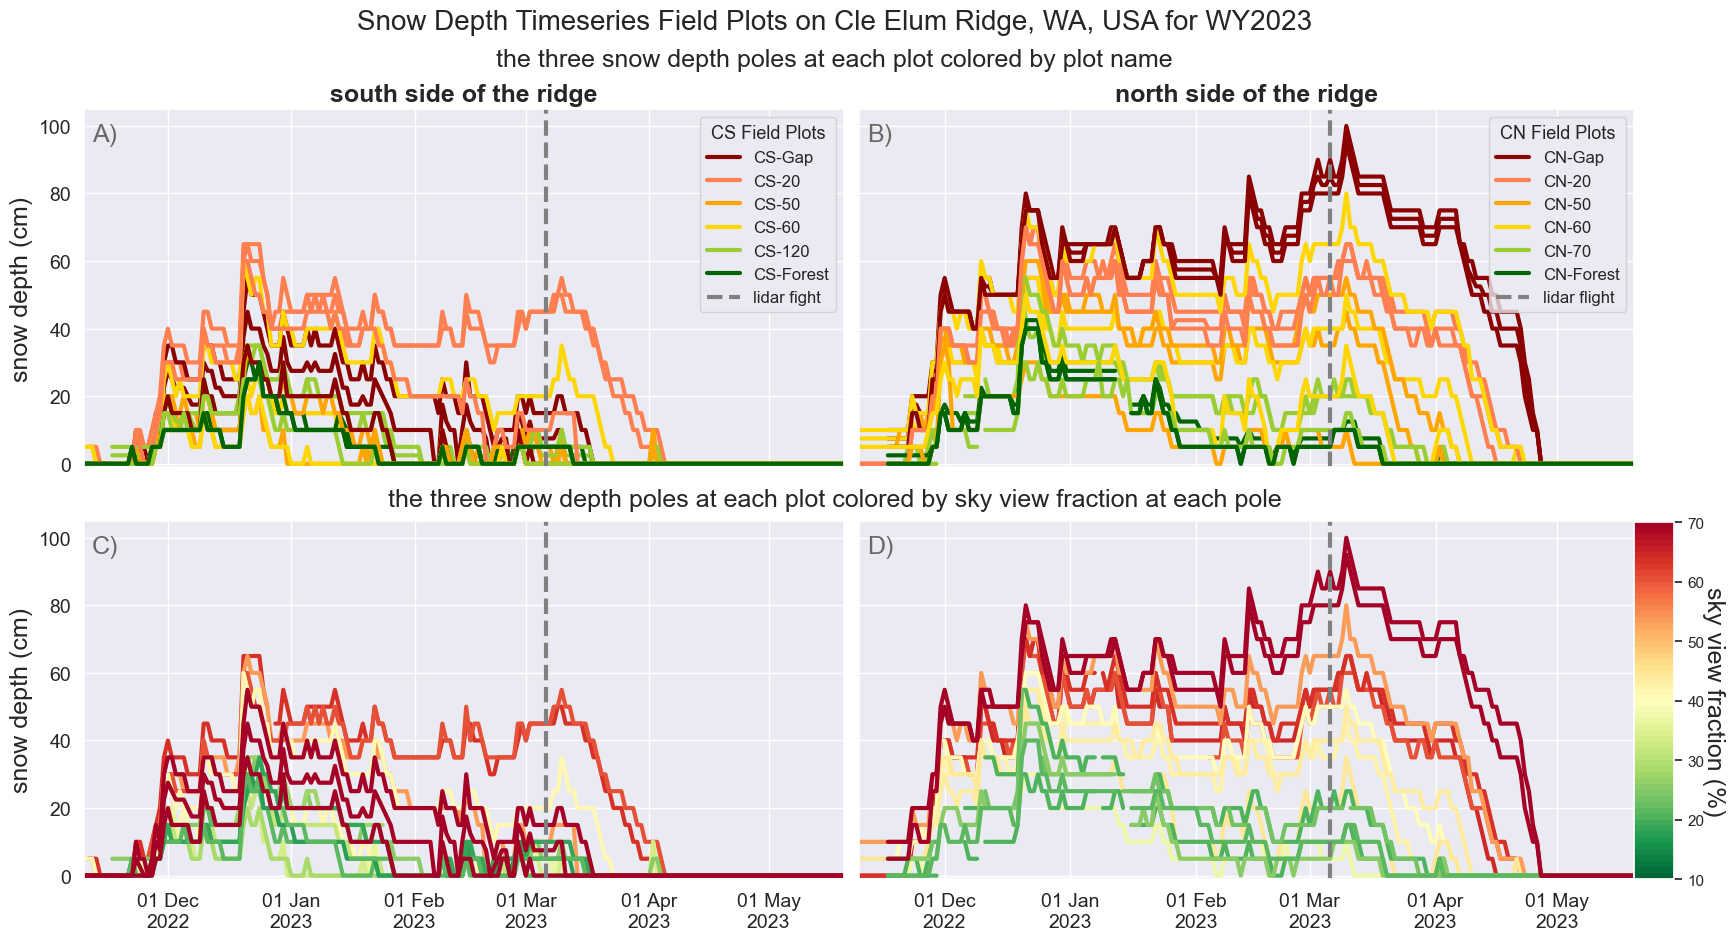

In [17]:
sns.set_theme()
linewidth = 3

fig, ax = plt.subplots(2,2,figsize = (20,10), sharey=True, sharex='col', gridspec_kw={'width_ratios': [1, 1.02]}) #, constrained_layout=True)

alpha=1
colorf1 = "darkgreen"
colorg1 = "darkred"

color20 = "coral"; color50 = "orange"; color60 = "gold"; color70 = "yellowgreen"

# COLORBAR 
colorbar_min = 10
colorbar_max = 70
N = int(colorbar_max - colorbar_min)
norm = mpl.colors.Normalize(vmin=colorbar_min, vmax=colorbar_max)
cmap = plt.get_cmap('RdYlGn_r', N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

cbar_ax = fig.add_axes([0.90, 0.11, 0.02, 0.357]) # locations means [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, label='sky view fraction (%)')
cbar.set_label(cbar.ax.get_ylabel(), rotation=270, labelpad=15, fontsize=18)

# Define a safe function to extract an integer from a single-element Series (preventing the issue in the above code)
def safe_int_lookup(df, location_id):
    subset = df.loc[df['LocationID'] == location_id, 'SiteOpennessAdjusted']
    return int(subset.iloc[0]) if not subset.empty else 0


# PART 1---------------------------------------------------------------------------------------------------------------------------------------------------

# plot median
ax[0,0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth)
ax[0,0].plot(CS20['Date'], CS20['Median_depth'], color = color20, label="CS-20", linewidth=linewidth)
ax[0,0].plot(CS50['Date'], CS50['Median_depth'], color = color50, label="CS-50",  linewidth=linewidth)
ax[0,0].plot(CS60['Date'], CS60['Median_depth'], color = color60, label="CS-60",  linewidth=linewidth)
ax[0,0].plot(CS120['Date'], CS120['Median_depth'], color = color70, label="CS-120",  linewidth=linewidth)
ax[0,0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest", linewidth=linewidth)

ax[0,1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth)
ax[0,1].plot(CN20['Date'], CN20['Median_depth'], color = color20, label="CN-20", linewidth=linewidth)
ax[0,1].plot(CN50['Date'], CN50['Median_depth'], color = color50, label="CN-50"  , linewidth=linewidth)
ax[0,1].plot(CN60['Date'], CN60['Median_depth'], color = color60, label="CN-60"  , linewidth=linewidth)
ax[0,1].plot(CN70['Date'], CN70['Median_depth'], color = color70, label="CN-70"  , linewidth=linewidth)
ax[0,1].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest", linewidth=linewidth)

# plot maximum
ax[0,0].plot(CSG23['Date'], CSG23['Maximum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS20['Date'], CS20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS50['Date'], CS50['Maximum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS60['Date'], CS60['Maximum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS120['Date'], CS120['Maximum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

ax[0,1].plot(CNG23['Date'], CNG23['Maximum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN20['Date'], CN20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN50['Date'], CN50['Maximum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN60['Date'], CN60['Maximum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN70['Date'], CN70['Maximum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

# plot maximum
ax[0,0].plot(CSG23['Date'], CSG23['Minimum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS20['Date'], CS20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS50['Date'], CS50['Minimum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS60['Date'], CS60['Minimum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS120['Date'], CS120['Minimum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

ax[0,1].plot(CNG23['Date'], CNG23['Minimum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN20['Date'], CN20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN50['Date'], CN50['Minimum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN60['Date'], CN60['Minimum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN70['Date'], CN70['Minimum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)


# PART 2---------------------------------------------------------------------------------------------------------------------------------------------------

# This code is now using the function defined above... 
# SOUTH SIDE
ax[1,0].plot(CS20['Date'], CS20['Pole1'], linewidth=linewidth, label = "CS-20-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole1")))
ax[1,0].plot(CS20['Date'], CS20['Pole2'], linewidth=linewidth, label = "CS-20-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole2")))
ax[1,0].plot(CS20['Date'], CS20['Pole3'], linewidth=linewidth, label = "CS-20-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole3")))

ax[1,0].plot(CS50['Date'], CS50['Pole1'], linewidth=linewidth, label = "CS-50-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-50-pole1")))
ax[1,0].plot(CS50['Date'], CS50['Pole2'], linewidth=linewidth, label = "CS-50-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-50-pole2")))
ax[1,0].plot(CS50['Date'], CS50['Pole3'], linewidth=linewidth, label = "CS-50-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-50-pole3")))

ax[1,0].plot(CS60['Date'], CS60['Pole1'], linewidth=linewidth, label = "CS-60-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-60-pole1")))
ax[1,0].plot(CS60['Date'], CS60['Pole2'], linewidth=linewidth, label = "CS-60-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-60-pole2")))
ax[1,0].plot(CS60['Date'], CS60['Pole3'], linewidth=linewidth, label = "CS-60-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-60-pole3")))

ax[1,0].plot(CS120['Date'], CS120['Pole1'], linewidth=linewidth, label = "CS-120-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-120-pole1")))
ax[1,0].plot(CS120['Date'], CS120['Pole2'], linewidth=linewidth, label = "CS-120-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-120-pole2")))
ax[1,0].plot(CS120['Date'], CS120['Pole3'], linewidth=linewidth, label = "CS-120-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-120-pole3")))

ax[1,0].plot(CSF23['Date'], CSF23['Pole1'], linewidth=linewidth, label = "CS-F-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-F-pole1")))
ax[1,0].plot(CSF23['Date'], CSF23['Pole2'], linewidth=linewidth, label = "CS-F-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-F-pole2")))
ax[1,0].plot(CSF23['Date'], CSF23['Pole3'], linewidth=linewidth, label = "CS-F-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-F-pole3")))

ax[1,0].plot(CSG23['Date'], CSG23['Pole1'], linewidth=linewidth, label = "CS-G-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole1")))
ax[1,0].plot(CSG23['Date'], CSG23['Median_depth'], linewidth=linewidth, label = "CS-G-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole2")))
ax[1,0].plot(CSG23['Date'], CSG23['Pole3'], linewidth=linewidth, label = "CS-G-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole3")))

# NORTH SIDE
ax[1,1].plot(CN20['Date'], CN20['Pole1'], linewidth=linewidth, label = "CN-20-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-20-pole1")))
ax[1,1].plot(CN20['Date'], CN20['Pole2'], linewidth=linewidth, label = "CN-20-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-20-pole2")))
ax[1,1].plot(CN20['Date'], CN20['Pole3'], linewidth=linewidth, label = "CN-20-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-20-pole3")))

ax[1,1].plot(CN50['Date'], CN50['Pole1'], linewidth=linewidth, label = "CN-50-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-50-pole1")))
ax[1,1].plot(CN50['Date'], CN50['Pole2'], linewidth=linewidth, label = "CN-50-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-50-pole2")))
ax[1,1].plot(CN50['Date'], CN50['Pole3'], linewidth=linewidth, label = "CN-50-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-50-pole3")))

ax[1,1].plot(CN60['Date'], CN60['Pole1'], linewidth=linewidth, label = "CN-60-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-60-pole1")))
ax[1,1].plot(CN60['Date'], CN60['Pole2'], linewidth=linewidth, label = "CN-60-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-60-pole2")))
ax[1,1].plot(CN60['Date'], CN60['Pole3'], linewidth=linewidth, label = "CN-60-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-60-pole3")))

ax[1,1].plot(CN70['Date'], CN70['Pole1'], linewidth=linewidth, label = "CN-70-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-70-pole1")))
ax[1,1].plot(CN70['Date'], CN70['Pole2'], linewidth=linewidth, label = "CN-70-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-70-pole2")))
ax[1,1].plot(CN70['Date'], CN70['Pole3'], linewidth=linewidth, label = "CN-70-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-70-pole3")))

ax[1,1].plot(CNF23['Date'], CNF23['Pole1'], linewidth=linewidth, label = "CN-F-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-F-pole1")))
ax[1,1].plot(CNF23['Date'], CNF23['Pole2'], linewidth=linewidth, label = "CN-F-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-F-pole2")))
ax[1,1].plot(CNF23['Date'], CNF23['Pole3'], linewidth=linewidth, label = "CN-F-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-F-pole3")))

ax[1,1].plot(CNG23['Date'], CNG23['Pole1'], linewidth=linewidth, label = "CN-G-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-G-pole1")))
ax[1,1].plot(CNG23['Date'], CNG23['Pole2'], linewidth=linewidth, label = "CN-G-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-G-pole2")))
ax[1,1].plot(CNG23['Date'], CNG23['Pole3'], linewidth=linewidth, label = "CN-G-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-G-pole3")))


## CONSTANTS FOR ROW 1----------------------------------------------------------------------------------
# add lines for the lidar data flights
ax[0,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=3)
ax[0,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)

ax[0,0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 20)])
ax[0,1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 20)])

ax[0,0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[0,1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0,0].set_ylabel("snow depth (cm)", fontsize = 18)
# ax[0,1].set_ylabel("snow depth (cm)")

ax[0,1].set_title("north side of the ridge", fontsize = 18, fontweight='bold')
ax[0,0].set_title("south side of the ridge", fontsize = 18, fontweight='bold')

# increase the size of the x and y tick marks
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)

ax[0,0].set_ylim(0,100)
ax[0,1].set_ylim(0,100)

# CONSTANTS FOR ROW 2 ----------------------------------------------------------------------------------
ax[1,0].set_ylim(-1,105)
ax[1,0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 20)])
ax[1,0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# ax[1,0].set_title("south side of the ridge", fontsize=18)
ax[1,0].set_ylabel("snow depth (cm)", fontsize=18)

ax[1,1].set_ylim(-1,105)
ax[1,1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 20)])
ax[1,1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# ax[1,1].set_title("north side of the ridge", fontsize=18)

ax[1,1].set_title('.', color='white')

# add a title to the legend for subplots A and B 
ax[0,0].legend(title='CS Field Plots', loc='upper right', fontsize=12, title_fontsize=13)
ax[0,1].legend(title='CN Field Plots', loc='upper right', fontsize=12, title_fontsize=13)


# OTHER CONSTANTS ----------------------------------------------------------------------------------
# add lines for the lidar data flights
ax[1,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)

# increase the size of the y axis labels
ax[1,0].tick_params(axis='y', labelsize=14)
ax[1,1].tick_params(axis='y', labelsize=14)

# increase the size of the x axis labels
ax[1,0].tick_params(axis='x', labelsize=14)
ax[1,1].tick_params(axis='x', labelsize=14)

# reduce the horizonal space between subplots
plt.subplots_adjust(wspace=0.02)

# reduce the verticle space between subplots 
plt.subplots_adjust(hspace=0.15)

# plt.suptitle("Snow Depth Timeseries Field Sites on Cle Elum Ridge, WA, USA for WY2023\nthree snow depth poles at each site", fontsize = 18)
plt.suptitle("Snow Depth Timeseries Field Plots on Cle Elum Ridge, WA, USA for WY2023", fontsize=20)

# Add a title to each row of subplot
fig.text(0.5, 0.93, 'the three snow depth poles at each plot colored by plot name', ha='center', va='center', fontsize=18) #,fontweight='bold')
fig.text(0.5, 0.49, 'the three snow depth poles at each plot colored by sky view fraction at each pole', ha='center', va='center', fontsize=18) #, fontweight='bold')

# add A) B) C) D) to the subplots 
ax[0,0].text(0.01, 0.91, 'A)', fontsize=18, color='dimgray', transform=ax[0,0].transAxes)
ax[0,1].text(0.01, 0.91, 'B)', fontsize=18, color='dimgray', transform=ax[0,1].transAxes)
ax[1,0].text(0.01, 0.91, 'C)', fontsize=18, color='dimgray', transform=ax[1,0].transAxes)
ax[1,1].text(0.01, 0.91, 'D)', fontsize=18, color='dimgray', transform=ax[1,1].transAxes)

# figure_name = 'figure5_timeseries.png'
# plt.savefig(figure_path + figure_name, dpi=500, bbox_inches="tight")

plt.show()

# Review Edits 
### let's play with the background color and the opacity of the figure to see if the yellow shows up more clearly...

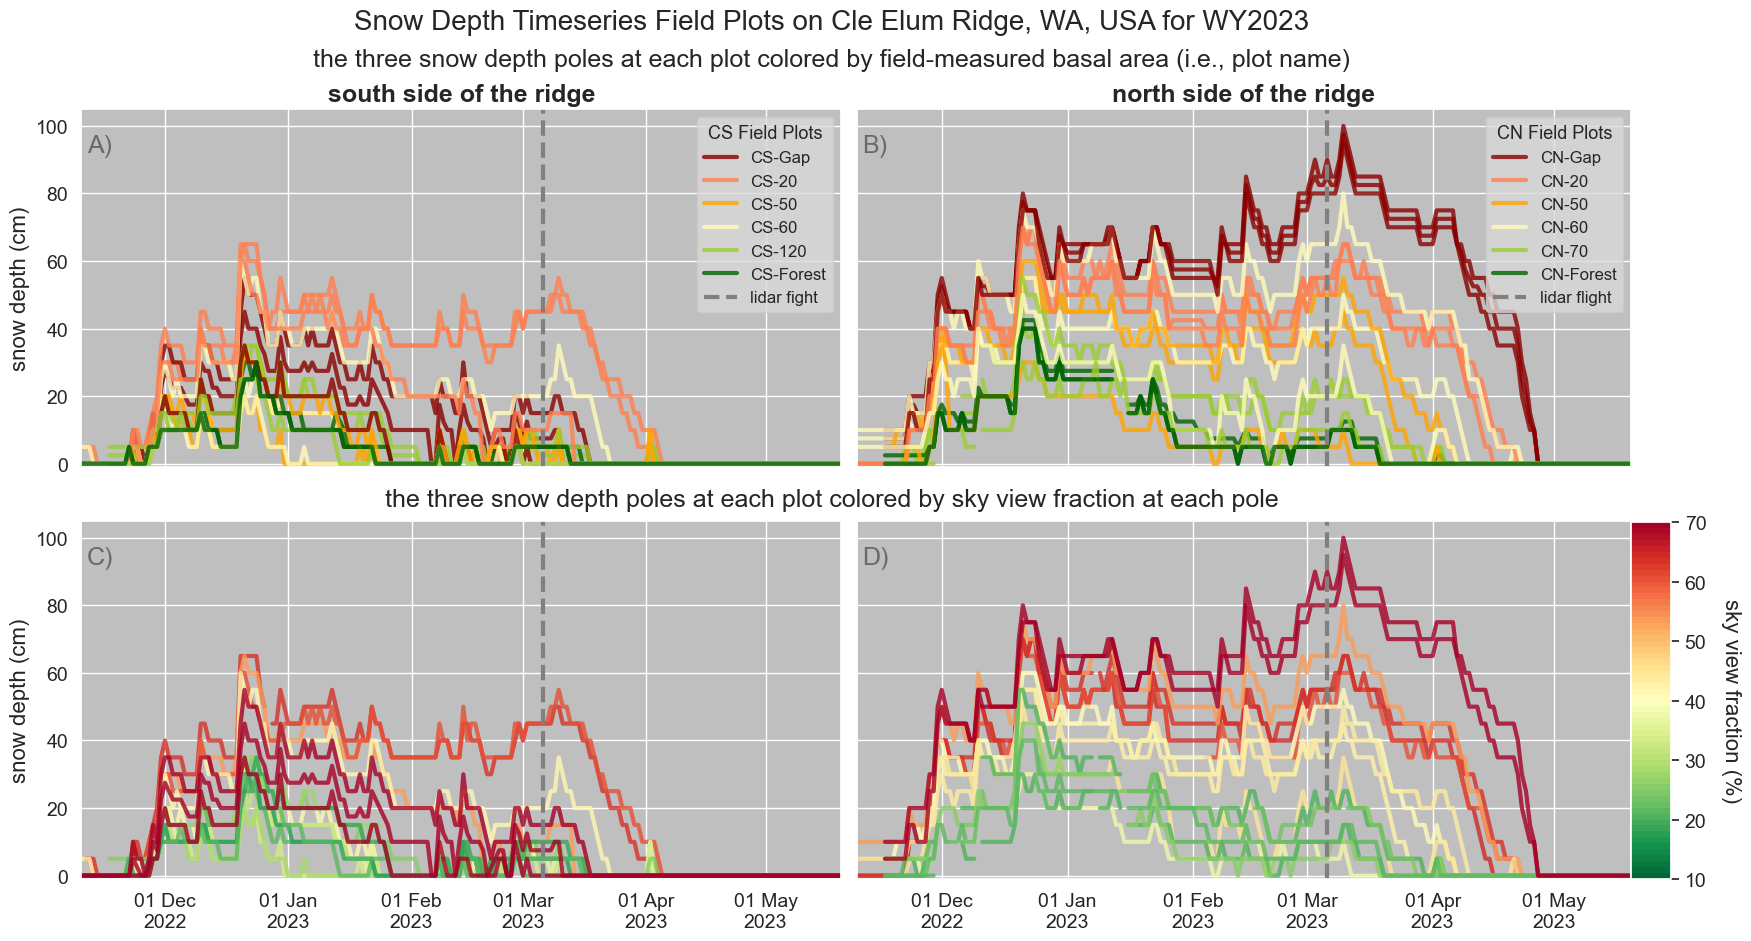

In [24]:
sns.set_theme() # PREVIOUS CODE 
# sns.set_style("whitegrid") # ONE OPTION FOR FIXING THE BACKGROUND
# sns.set_theme(style="darkgrid")
# plt.rcParams['axes.facecolor'] = '0.85'   # light gray background
# plt.rcParams['figure.facecolor'] = '0.9'  # lighter overall background

linewidth = 3

fig, ax = plt.subplots(2,2,figsize = (20,10), sharey=True, sharex='col', gridspec_kw={'width_ratios': [1, 1.02]}) #, constrained_layout=True)

alpha=0.8
colorf1 = "darkgreen"
colorg1 = "darkred"

# trying different colors for the first row 
# color20 = "coral"; color50 = "orange"; color60 = "gold"; color70 = "yellowgreen"
color20 = "coral"; color50 = "orange"; color60 = "lightgoldenrodyellow"; color70 = "yellowgreen" # color60 was gold, but I'm going to increase the illuminosity a bit


# ---------------------------------------------------------------
# # COLORBAR 
colorbar_min = 10
colorbar_max = 70
N = int(colorbar_max - colorbar_min)
norm = mpl.colors.Normalize(vmin=colorbar_min, vmax=colorbar_max)
cmap = plt.get_cmap('RdYlGn_r', N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# I want to select the yellow color from within the RdYlGn_r colormap for color60
# colorf1 = cmap(0.10)  # Get the color at 10% of the colormap
# color30 = cmap(0.20)  # Get the color at 20% of the colormap
# color50 = cmap(0.30)  # Get the color at 50% of
color60 = cmap(0.50)  # Get the color at 80% of the colormap
# color70 = cmap(0.60)  # Get the color at 70% of the colormap
# colorg1 = cmap(0.75)  # Get the color at 95% of the colormap


# ----------------------------------------------------------------
# # --- Define colorbar range ---
# colorbar_min = 10
# colorbar_max = 70
# N = int(colorbar_max - colorbar_min)
# norm = mpl.colors.Normalize(vmin=colorbar_min, vmax=colorbar_max)

# # Get the base colormap
# base_cmap = plt.get_cmap('RdYlGn_r', N)

# # Extract and darken colors (reduce brightness more strongly)
# colors = base_cmap(np.linspace(0, 1, N))
# dark_factor = 0.9   # try 0.7–0.8 for stronger darkening
# colors[:, :3] = np.clip(colors[:, :3] * dark_factor + 0.05, 0, 1)

# cmap = mpl.colors.ListedColormap(colors)

# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

#---------------------------------------------------------------
cbar_ax = fig.add_axes([0.90, 0.11, 0.02, 0.357]) # locations means [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, label='sky view fraction (%)')
cbar.set_label(cbar.ax.get_ylabel(), rotation=270, labelpad=25, fontsize=16)

# set the font size of the cbar tick marks
cbar.ax.tick_params(labelsize=14)


# Define a safe function to extract an integer from a single-element Series (preventing the issue in the above code)
def safe_int_lookup(df, location_id):
    subset = df.loc[df['LocationID'] == location_id, 'SiteOpennessAdjusted']
    return int(subset.iloc[0]) if not subset.empty else 0


# PART 1---------------------------------------------------------------------------------------------------------------------------------------------------

# plot median
ax[0,0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap", linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS20['Date'], CS20['Median_depth'], color = color20, label="CS-20", linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS50['Date'], CS50['Median_depth'], color = color50, label="CS-50",  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS60['Date'], CS60['Median_depth'], color = color60, label="CS-60",  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS120['Date'], CS120['Median_depth'], color = color70, label="CS-120",  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest", linewidth=linewidth, alpha=alpha)

ax[0,1].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap", linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN20['Date'], CN20['Median_depth'], color = color20, label="CN-20", linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN50['Date'], CN50['Median_depth'], color = color50, label="CN-50"  , linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN60['Date'], CN60['Median_depth'], color = color60, label="CN-60"  , linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN70['Date'], CN70['Median_depth'], color = color70, label="CN-70"  , linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest", linewidth=linewidth, alpha=alpha)

# plot maximum
ax[0,0].plot(CSG23['Date'], CSG23['Maximum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS20['Date'], CS20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS50['Date'], CS50['Maximum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS60['Date'], CS60['Maximum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS120['Date'], CS120['Maximum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

ax[0,1].plot(CNG23['Date'], CNG23['Maximum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN20['Date'], CN20['Maximum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN50['Date'], CN50['Maximum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN60['Date'], CN60['Maximum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN70['Date'], CN70['Maximum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

# plot maximum
ax[0,0].plot(CSG23['Date'], CSG23['Minimum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS20['Date'], CS20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS50['Date'], CS50['Minimum_depth'], color = color50, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS60['Date'], CS60['Minimum_depth'], color = color60, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CS120['Date'], CS120['Minimum_depth'], color = color70, label=None,  linewidth=linewidth, alpha=alpha)
ax[0,0].plot(CSF23['Date'], CSF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)

ax[0,1].plot(CNG23['Date'], CNG23['Minimum_depth'], color = colorg1, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN20['Date'], CN20['Minimum_depth'], color = color20, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN50['Date'], CN50['Minimum_depth'], color = color50, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN60['Date'], CN60['Minimum_depth'], color = color60, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CN70['Date'], CN70['Minimum_depth'], color = color70, label=None, linewidth=linewidth, alpha=alpha)
ax[0,1].plot(CNF23['Date'], CNF23['Minimum_depth'], color = colorf1, label=None, linewidth=linewidth, alpha=alpha)


# PART 2---------------------------------------------------------------------------------------------------------------------------------------------------

# This code is now using the function defined above... 
# SOUTH SIDE
ax[1,0].plot(CS20['Date'], CS20['Pole1'], linewidth=linewidth, alpha=alpha, label = "CS-20-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole1")))
ax[1,0].plot(CS20['Date'], CS20['Pole2'], linewidth=linewidth, alpha=alpha, label = "CS-20-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole2")))
ax[1,0].plot(CS20['Date'], CS20['Pole3'], linewidth=linewidth, alpha=alpha, label = "CS-20-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole3")))

ax[1,0].plot(CS50['Date'], CS50['Pole1'], linewidth=linewidth, alpha=alpha, label = "CS-50-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-50-pole1")))
ax[1,0].plot(CS50['Date'], CS50['Pole2'], linewidth=linewidth, alpha=alpha, label = "CS-50-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-50-pole2")))
ax[1,0].plot(CS50['Date'], CS50['Pole3'], linewidth=linewidth, alpha=alpha, label = "CS-50-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-50-pole3")))

ax[1,0].plot(CS60['Date'], CS60['Pole1'], linewidth=linewidth, alpha=alpha, label = "CS-60-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-60-pole1")))
ax[1,0].plot(CS60['Date'], CS60['Pole2'], linewidth=linewidth, alpha=alpha, label = "CS-60-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-60-pole2")))
ax[1,0].plot(CS60['Date'], CS60['Pole3'], linewidth=linewidth, alpha=alpha, label = "CS-60-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-60-pole3")))

ax[1,0].plot(CS120['Date'], CS120['Pole1'], linewidth=linewidth, alpha=alpha, label = "CS-120-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-120-pole1")))
ax[1,0].plot(CS120['Date'], CS120['Pole2'], linewidth=linewidth, alpha=alpha, label = "CS-120-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-120-pole2")))
ax[1,0].plot(CS120['Date'], CS120['Pole3'], linewidth=linewidth, alpha=alpha, label = "CS-120-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-120-pole3")))

ax[1,0].plot(CSF23['Date'], CSF23['Pole1'], linewidth=linewidth, alpha=alpha, label = "CS-F-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-F-pole1")))
ax[1,0].plot(CSF23['Date'], CSF23['Pole2'], linewidth=linewidth, alpha=alpha, label = "CS-F-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-F-pole2")))
ax[1,0].plot(CSF23['Date'], CSF23['Pole3'], linewidth=linewidth, alpha=alpha, label = "CS-F-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-F-pole3")))

ax[1,0].plot(CSG23['Date'], CSG23['Pole1'], linewidth=linewidth, alpha=alpha, label = "CS-G-pole1", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole1")))
ax[1,0].plot(CSG23['Date'], CSG23['Median_depth'], linewidth=linewidth, alpha=alpha, label = "CS-G-pole2", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole2")))
ax[1,0].plot(CSG23['Date'], CSG23['Pole3'], linewidth=linewidth, alpha=alpha, label = "CS-G-pole3", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole3")))

# NORTH SIDE
ax[1,1].plot(CN20['Date'], CN20['Pole1'], linewidth=linewidth, alpha=alpha, label = "CN-20-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-20-pole1")))
ax[1,1].plot(CN20['Date'], CN20['Pole2'], linewidth=linewidth, alpha=alpha, label = "CN-20-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-20-pole2")))
ax[1,1].plot(CN20['Date'], CN20['Pole3'], linewidth=linewidth, alpha=alpha, label = "CN-20-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-20-pole3")))

ax[1,1].plot(CN50['Date'], CN50['Pole1'], linewidth=linewidth, alpha=alpha, label = "CN-50-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-50-pole1")))
ax[1,1].plot(CN50['Date'], CN50['Pole2'], linewidth=linewidth, alpha=alpha, label = "CN-50-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-50-pole2")))
ax[1,1].plot(CN50['Date'], CN50['Pole3'], linewidth=linewidth, alpha=alpha, label = "CN-50-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-50-pole3")))

ax[1,1].plot(CN60['Date'], CN60['Pole1'], linewidth=linewidth, alpha=alpha, label = "CN-60-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-60-pole1")))
ax[1,1].plot(CN60['Date'], CN60['Pole2'], linewidth=linewidth, alpha=alpha, label = "CN-60-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-60-pole2")))
ax[1,1].plot(CN60['Date'], CN60['Pole3'], linewidth=linewidth, alpha=alpha, label = "CN-60-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-60-pole3")))

ax[1,1].plot(CN70['Date'], CN70['Pole1'], linewidth=linewidth, alpha=alpha, label = "CN-70-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-70-pole1")))
ax[1,1].plot(CN70['Date'], CN70['Pole2'], linewidth=linewidth, alpha=alpha, label = "CN-70-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-70-pole2")))
ax[1,1].plot(CN70['Date'], CN70['Pole3'], linewidth=linewidth, alpha=alpha, label = "CN-70-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-70-pole3")))

ax[1,1].plot(CNF23['Date'], CNF23['Pole1'], linewidth=linewidth, alpha=alpha, label = "CN-F-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-F-pole1")))
ax[1,1].plot(CNF23['Date'], CNF23['Pole2'], linewidth=linewidth, alpha=alpha, label = "CN-F-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-F-pole2")))
ax[1,1].plot(CNF23['Date'], CNF23['Pole3'], linewidth=linewidth, alpha=alpha, label = "CN-F-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-F-pole3")))

ax[1,1].plot(CNG23['Date'], CNG23['Pole1'], linewidth=linewidth, alpha=alpha, label = "CN-G-pole1", c=cmap(safe_int_lookup(SDD_CN23, "CN-G-pole1")))
ax[1,1].plot(CNG23['Date'], CNG23['Pole2'], linewidth=linewidth, alpha=alpha, label = "CN-G-pole2", c=cmap(safe_int_lookup(SDD_CN23, "CN-G-pole2")))
ax[1,1].plot(CNG23['Date'], CNG23['Pole3'], linewidth=linewidth, alpha=alpha, label = "CN-G-pole3", c=cmap(safe_int_lookup(SDD_CN23, "CN-G-pole3")))


## CONSTANTS FOR ROW 1----------------------------------------------------------------------------------
# add lines for the lidar data flights
ax[0,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=3)
ax[0,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)

ax[0,0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 20)])
ax[0,1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 20)])

ax[0,0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[0,1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0,0].set_ylabel("snow depth (cm)", fontsize = 16)
# ax[0,1].set_ylabel("snow depth (cm)")

ax[0,1].set_title("north side of the ridge", fontsize = 18, fontweight='bold')
ax[0,0].set_title("south side of the ridge", fontsize = 18, fontweight='bold')

# increase the size of the x and y tick marks
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)

ax[0,0].set_ylim(0,100)
ax[0,1].set_ylim(0,100)

# CONSTANTS FOR ROW 2 ----------------------------------------------------------------------------------
ax[1,0].set_ylim(-1,105)
ax[1,0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 20)])
ax[1,0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# ax[1,0].set_title("south side of the ridge", fontsize=18)
ax[1,0].set_ylabel("snow depth (cm)", fontsize=16)

ax[1,1].set_ylim(-1,105)
ax[1,1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 20)])
ax[1,1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
# ax[1,1].set_title("north side of the ridge", fontsize=18)

ax[1,1].set_title('.', color='white')

# add a title to the legend for subplots A and B 
ax[0,0].legend(title='CS Field Plots', loc='upper right', fontsize=12, title_fontsize=13)
ax[0,1].legend(title='CN Field Plots', loc='upper right', fontsize=12, title_fontsize=13)


# OTHER CONSTANTS ----------------------------------------------------------------------------------
# add lines for the lidar data flights
ax[1,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)

# increase the size of the y axis labels
ax[1,0].tick_params(axis='y', labelsize=14)
ax[1,1].tick_params(axis='y', labelsize=14)

# increase the size of the x axis labels
ax[1,0].tick_params(axis='x', labelsize=14)
ax[1,1].tick_params(axis='x', labelsize=14)

# reduce the horizonal space between subplots
plt.subplots_adjust(wspace=0.02)

# reduce the verticle space between subplots 
plt.subplots_adjust(hspace=0.15)

# plt.suptitle("Snow Depth Timeseries Field Sites on Cle Elum Ridge, WA, USA for WY2023\nthree snow depth poles at each site", fontsize = 18)
plt.suptitle("Snow Depth Timeseries Field Plots on Cle Elum Ridge, WA, USA for WY2023", fontsize=20)

# Add a title to each row of subplot
fig.text(0.5, 0.93, 'the three snow depth poles at each plot colored by field-measured basal area (i.e., plot name)', ha='center', va='center', fontsize=18) #,fontweight='bold')
fig.text(0.5, 0.49, 'the three snow depth poles at each plot colored by sky view fraction at each pole', ha='center', va='center', fontsize=18) #, fontweight='bold')

# add A) B) C) D) to the subplots 
ax[0,0].text(0.007, 0.88, 'A)', fontsize=18, color='dimgray', transform=ax[0,0].transAxes) # first number is the x position, second number is the y position
ax[0,1].text(0.007, 0.88, 'B)', fontsize=18, color='dimgray', transform=ax[0,1].transAxes)
ax[1,0].text(0.007, 0.88, 'C)', fontsize=18, color='dimgray', transform=ax[1,0].transAxes)
ax[1,1].text(0.007, 0.88, 'D)', fontsize=18, color='dimgray', transform=ax[1,1].transAxes)

# increase the darkness of the background colors 
ax[0,0].set_facecolor("0.75")  # light gray background for subplot only (0 = black, 1 = white)
ax[0,1].set_facecolor("0.75")  # light gray background for subplot only (0 = black, 1 = white)
ax[1,0].set_facecolor("0.75")  # light gray background for subplot only (0 = black, 1 = white)
ax[1,1].set_facecolor("0.75")  # light gray background for subplot only (0 = black, 1 = white)

# change the background color of the legend boxes
legend1 = ax[0,0].get_legend()
legend1.get_frame().set_facecolor("0.85")  # lighter gray for legend
legend2 = ax[0,1].get_legend()
legend2.get_frame().set_facecolor("0.85")  # lighter gray for legend

figure_name = 'figure5_timeseries.jpg'
plt.savefig(figure_path + figure_name, dpi=500, bbox_inches="tight")

plt.show()

In [19]:
print(cmap.N)

60


In [20]:
print(norm.vmin, norm.vmax)

10.0 70.0


# Figure 10

/tmp/ipykernel_3279709/3245272225.py:41: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[1].plot(CSG23['Date'], CSG23['Pole1'], linewidth=linewidth, label = "CS-Gap plot: pole 1 (edge)", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])), linestyle='--')
/tmp/ipykernel_3279709/3245272225.py:43: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[1].plot(CSG23['Date'], CSG23['Median_depth'], linewidth=linewidth, label = "CS-Gap plot: pole 2 (tree)", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])), linestyle='--')
/tmp/ipykernel_3279709/3245272225.py:44: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ax[1].plot(CSG23['Date'], CSG23['

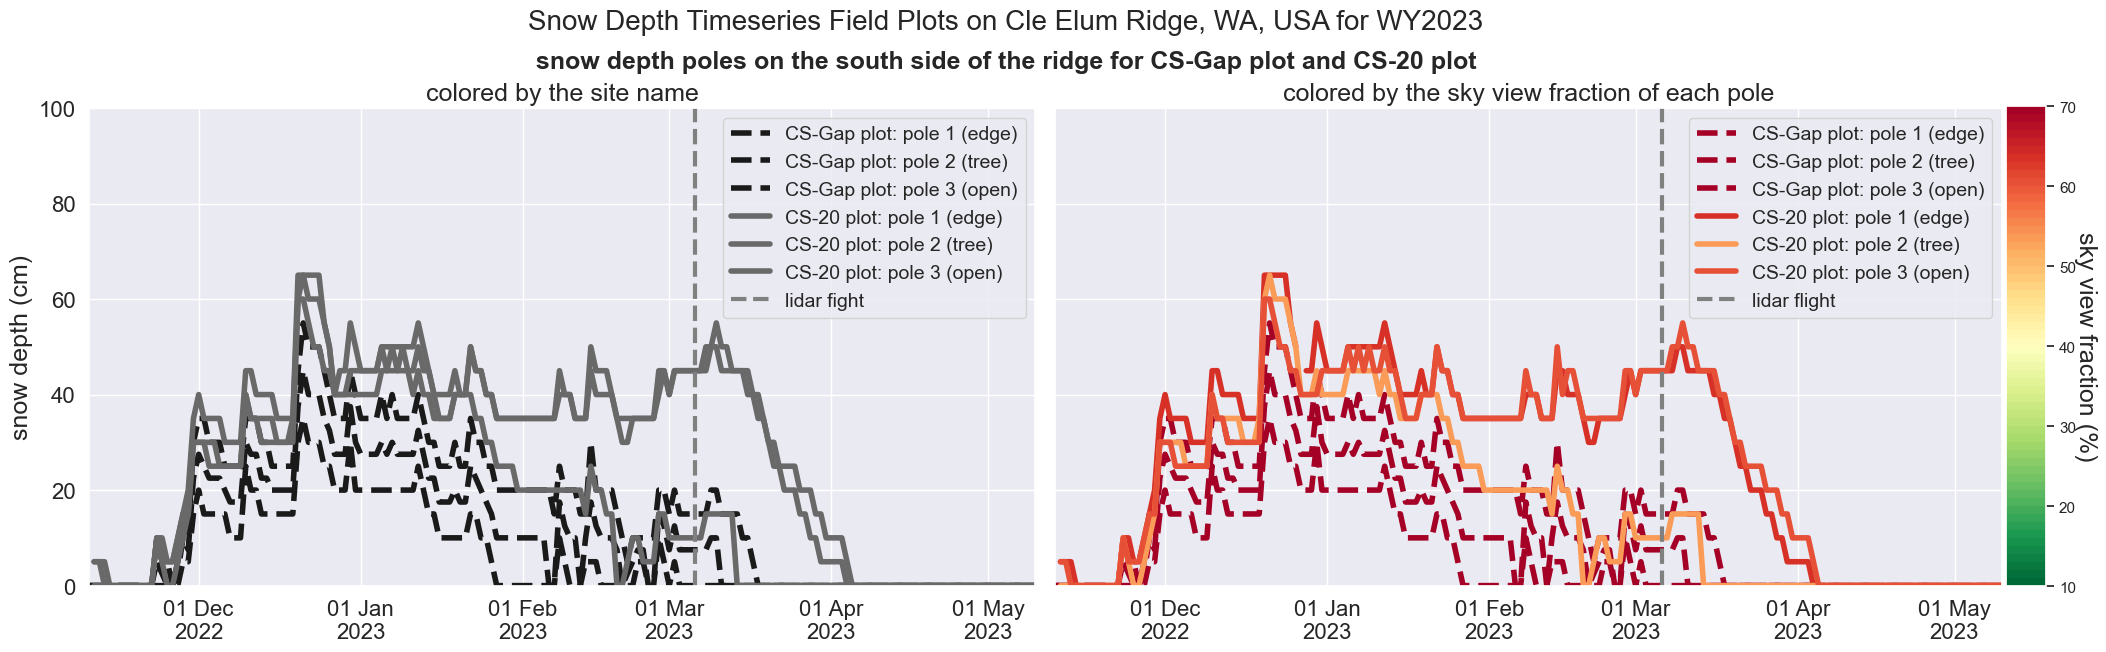

In [21]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_theme()

fig, ax = plt.subplots(1,2,figsize = (20,6), sharey=True, sharex=True, constrained_layout=True)

alpha=1
colorf1 = "darkgreen"
colorg1 = "darkred"

color20 = "coral"; color50 = "orange"; color60 = "gold"; color70 = "yellowgreen"
linewidth = 4

# COLORBAR 
colorbar_min = 10
colorbar_max = 70
N = int(colorbar_max - colorbar_min)
norm = mpl.colors.Normalize(vmin=colorbar_min, vmax=colorbar_max)
cmap = plt.get_cmap('RdYlGn_r', N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# cbar_ax = fig.add_axes([0.91, 0.11, 0.02, 0.335])
cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.80])  # adjust position and size (x, from bottom, width of bar, height of bar)

cbar = fig.colorbar(sm, cax=cbar_ax, label='sky view fraction (%)')
cbar.set_label(cbar.ax.get_ylabel(), rotation=270, labelpad=15, fontsize=18)


# PLOT 1
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = 'k', label="CS-Gap plot: pole 1 (edge)", linewidth=linewidth, linestyle='--')
ax[0].plot(CSG23['Date'], CSG23['Maximum_depth'], color = 'k', label='CS-Gap plot: pole 2 (tree)', linewidth=linewidth, alpha=alpha, linestyle='--')
ax[0].plot(CSG23['Date'], CSG23['Minimum_depth'], color = 'k', label='CS-Gap plot: pole 3 (open)', linewidth=linewidth, alpha=alpha, linestyle='--')

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = 'dimgrey', label="CS-20 plot: pole 1 (edge)", linewidth=linewidth)
ax[0].plot(CS20['Date'], CS20['Maximum_depth'], color = 'dimgrey', label='CS-20 plot: pole 2 (tree)', linewidth=linewidth, alpha=alpha)
ax[0].plot(CS20['Date'], CS20['Minimum_depth'], color = 'dimgrey', label='CS-20 plot: pole 3 (open)', linewidth=linewidth, alpha=alpha)


# PLOT 2
#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CSG23['Date'], CSG23['Pole1'], linewidth=linewidth, label = "CS-Gap plot: pole 1 (edge)", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])), linestyle='--')
# ax[1].plot(CSG23['Date'], CSG23['Pole2'], linewidth=linewidth, label = "CS-Gap plot: pole 2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])), linestyle='--')
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], linewidth=linewidth, label = "CS-Gap plot: pole 2 (tree)", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])), linestyle='--')
ax[1].plot(CSG23['Date'], CSG23['Pole3'], linewidth=linewidth, label = "CS-Gap plot: pole 3 (open)", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])), linestyle='--')

ax[1].plot(CS20['Date'], CS20['Pole1'], linewidth=linewidth, label = "CS-20 plot: pole 1 (edge)", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], linewidth=linewidth, label = "CS-20 plot: pole 2 (tree)", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], linewidth=linewidth, label = "CS-20 plot: pole 3 (open)", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))


## CONSTANTS
# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)

ax[0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 10)])
ax[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize = 18)

ax[0].set_title("colored by the site name", fontsize = 18)
ax[1].set_title("colored by the sky view fraction of each pole", fontsize = 18)


# increase the size of the x and y tick marks
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[0].legend(loc='upper right', fontsize = 14)
ax[1].legend(loc='upper right', fontsize = 14)

ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)

# add text above the suptitle 
fig.text(0.5, 1.04, 'Snow Depth Timeseries Field Plots on Cle Elum Ridge, WA, USA for WY2023', ha='center', va='center', fontsize=20)

plt.suptitle("snow depth poles on the south side of the ridge for CS-Gap plot and CS-20 plot",fontsize=18, fontweight='bold')

# figure_name = 'figure10_timeseries.png'
# plt.savefig(figure_path + figure_name, dpi=500, bbox_inches='tight') # that fixed the problem of title out of figure

plt.show()

making a verison which doesn't give error mesgs,...

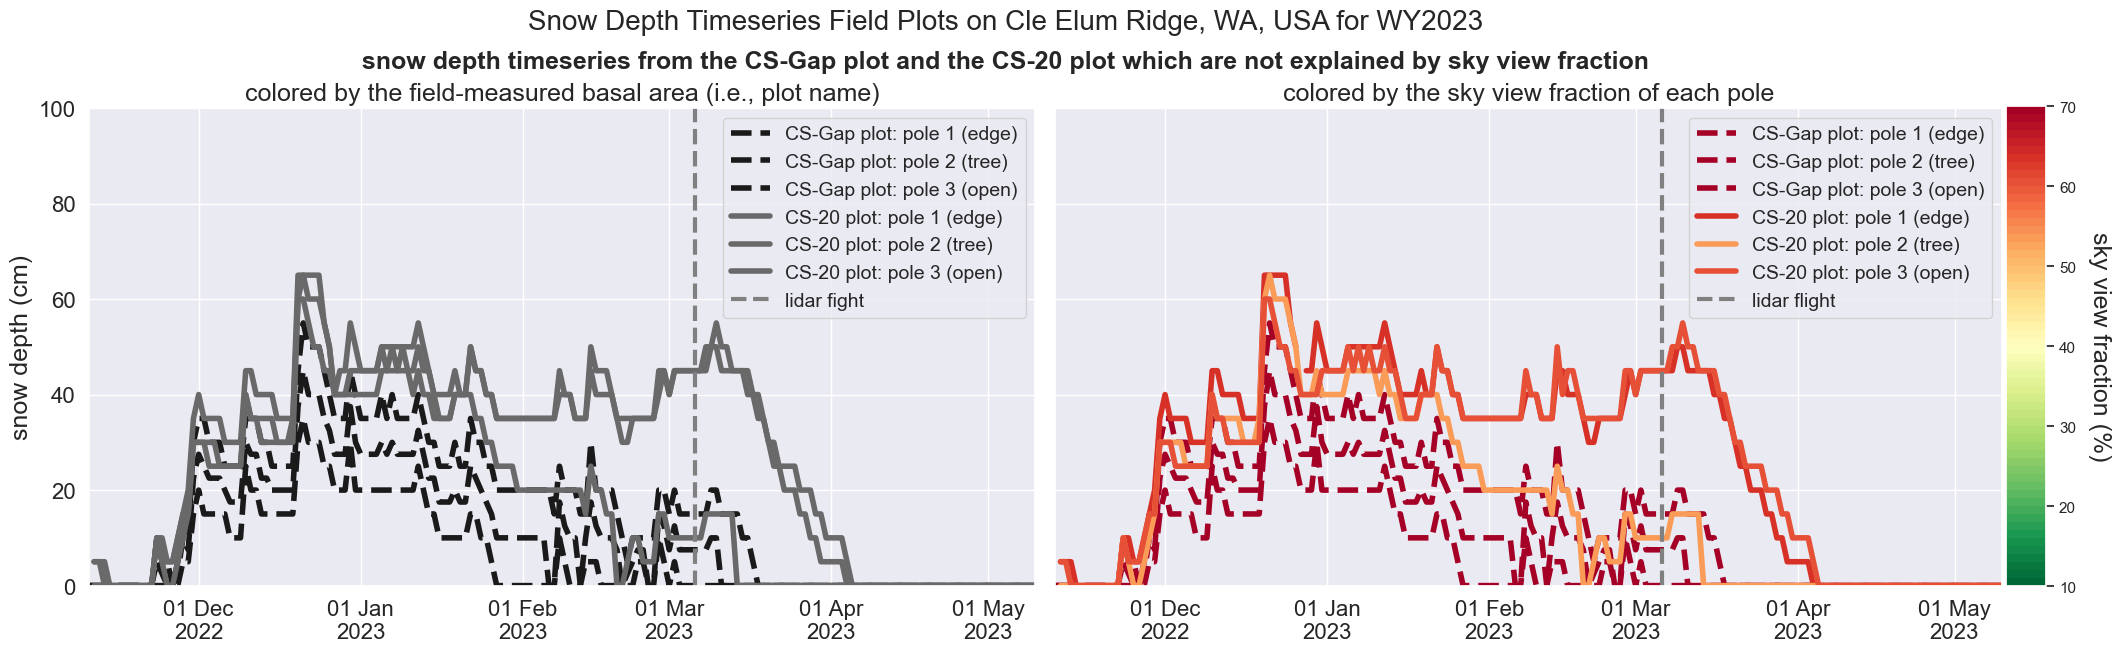

In [29]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_theme()

fig, ax = plt.subplots(1,2,figsize = (20,6), sharey=True, sharex=True, constrained_layout=True)

alpha=1
colorf1 = "darkgreen"
colorg1 = "darkred"

color20 = "coral"; color50 = "orange"; color60 = "gold"; color70 = "yellowgreen"
linewidth = 4

# COLORBAR 
colorbar_min = 10
colorbar_max = 70
N = int(colorbar_max - colorbar_min)
norm = mpl.colors.Normalize(vmin=colorbar_min, vmax=colorbar_max)
cmap = plt.get_cmap('RdYlGn_r', N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# cbar_ax = fig.add_axes([0.91, 0.11, 0.02, 0.335])
cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.80])  # adjust position and size (x, from bottom, width of bar, height of bar)

cbar = fig.colorbar(sm, cax=cbar_ax, label='sky view fraction (%)')
cbar.set_label(cbar.ax.get_ylabel(), rotation=270, labelpad=25, fontsize=18)

# Define a safe function to extract an integer from a single-element Series (preventing the issue in the above code)
def safe_int_lookup(df, location_id):
    subset = df.loc[df['LocationID'] == location_id, 'SiteOpennessAdjusted']
    return int(subset.iloc[0]) if not subset.empty else 0

# PLOT 1
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = 'k', label="CS-Gap plot: pole 1 (edge)", linewidth=linewidth, linestyle='--')
ax[0].plot(CSG23['Date'], CSG23['Maximum_depth'], color = 'k', label='CS-Gap plot: pole 2 (tree)', linewidth=linewidth, alpha=alpha, linestyle='--')
ax[0].plot(CSG23['Date'], CSG23['Minimum_depth'], color = 'k', label='CS-Gap plot: pole 3 (open)', linewidth=linewidth, alpha=alpha, linestyle='--')

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = 'dimgrey', label="CS-20 plot: pole 1 (edge)", linewidth=linewidth)
ax[0].plot(CS20['Date'], CS20['Maximum_depth'], color = 'dimgrey', label='CS-20 plot: pole 2 (tree)', linewidth=linewidth, alpha=alpha)
ax[0].plot(CS20['Date'], CS20['Minimum_depth'], color = 'dimgrey', label='CS-20 plot: pole 3 (open)', linewidth=linewidth, alpha=alpha)


# PLOT 2
#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CSG23['Date'], CSG23['Pole1'], linewidth=linewidth, label = "CS-Gap plot: pole 1 (edge)", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole1")), linestyle='--')
# ax[1].plot(CSG23['Date'], CSG23['Pole2'], linewidth=linewidth, label = "CS-Gap plot: pole 2", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole2")), linestyle='--')
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], linewidth=linewidth, label = "CS-Gap plot: pole 2 (tree)", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole2")), linestyle='--')
ax[1].plot(CSG23['Date'], CSG23['Pole3'], linewidth=linewidth, label = "CS-Gap plot: pole 3 (open)", c=cmap(safe_int_lookup(SDD_CS23, "CS-G-pole3")), linestyle='--')

ax[1].plot(CS20['Date'], CS20['Pole1'], linewidth=linewidth, label = "CS-20 plot: pole 1 (edge)", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole1")))
ax[1].plot(CS20['Date'], CS20['Pole2'], linewidth=linewidth, label = "CS-20 plot: pole 2 (tree)", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole2")))
ax[1].plot(CS20['Date'], CS20['Pole3'], linewidth=linewidth, label = "CS-20 plot: pole 3 (open)", c=cmap(safe_int_lookup(SDD_CS23, "CS-20-pole3")))


## CONSTANTS
# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar fight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)

ax[0].set_xlim([datetime.date(2020, 11, 10), datetime.date(2021, 5, 10)])
ax[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 10)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize = 18)

ax[0].set_title("colored by the field-measured basal area (i.e., plot name)", fontsize = 18)
ax[1].set_title("colored by the sky view fraction of each pole", fontsize = 18)


# increase the size of the x and y tick marks
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[0].legend(loc='upper right', fontsize = 14)
ax[1].legend(loc='upper right', fontsize = 14)

ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)

# add text above the suptitle 
fig.text(0.5, 1.04, 'Snow Depth Timeseries Field Plots on Cle Elum Ridge, WA, USA for WY2023', ha='center', va='center', fontsize=20)

plt.suptitle("snow depth timeseries from the CS-Gap plot and the CS-20 plot which are not explained by sky view fraction",fontsize=18, fontweight='bold')

figure_name = 'figure10_timeseries.jpg'
plt.savefig(figure_path + figure_name, dpi=500, bbox_inches='tight') # that fixed the problem of title out of figure

plt.show()